In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Loading the Dataset

In [4]:
data = pdata = pd.read_csv("Boston House Prices Dataset.csv")

In [5]:
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [6]:
# Performing EDA

In [7]:
# Understanding the Structure of Dataset

In [8]:
# Check the shape of the dataset
print(data.shape)

(506, 14)


In [9]:
# Check the column names (features)
print(data.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [10]:
# Check the column names and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
# Checking for Missing Data

In [12]:
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [13]:
# Summarizing the Data

# Get summary statistics for numerical features
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [14]:
# Understanding Distributions

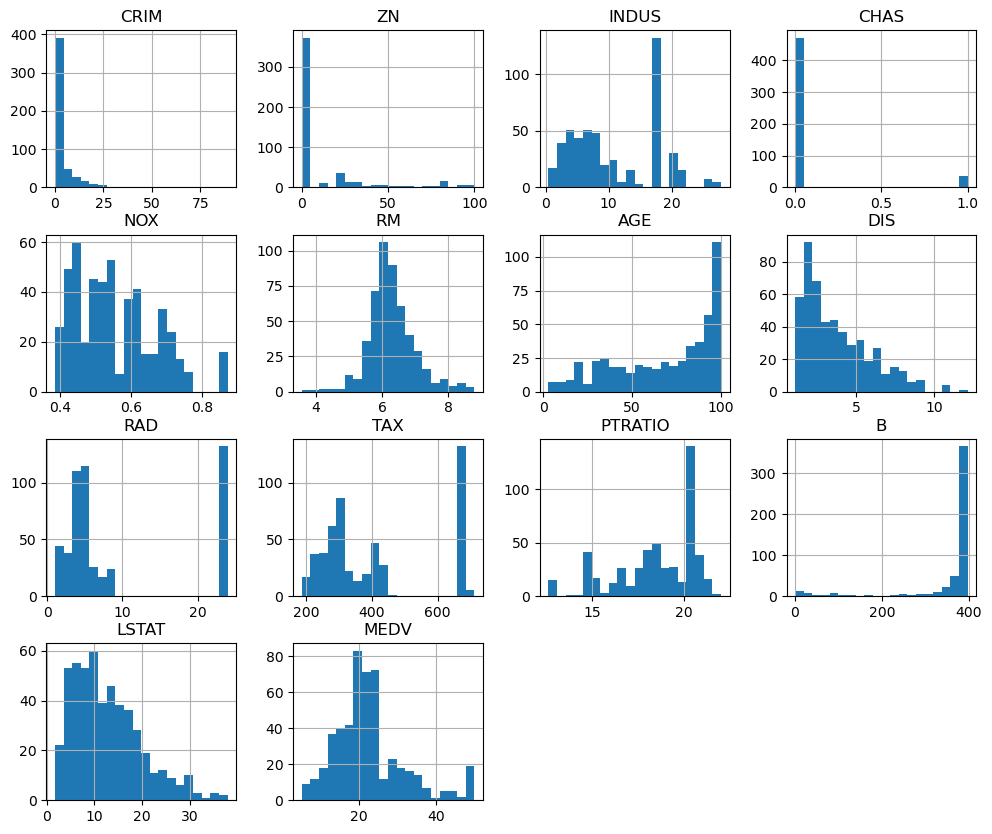

In [15]:
# Ploting histograms for each numerical feature
data.hist(bins=20, figsize=(12, 10))
plt.show()

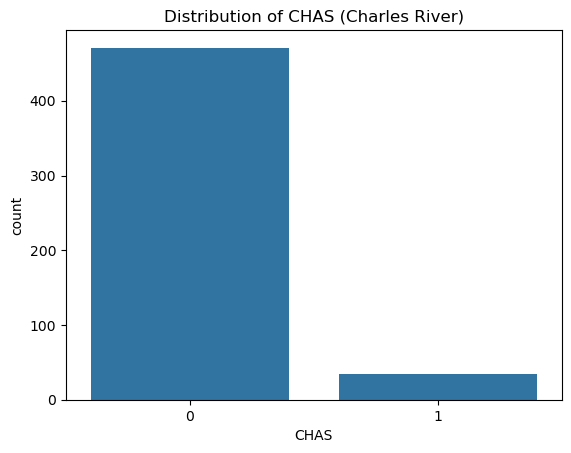

In [16]:
# Using a count plot to visualize the distribution of CHAS

sns.countplot(x='CHAS', data=data)
plt.title('Distribution of CHAS (Charles River)')
plt.show()


In [17]:
# Looking for Outliers

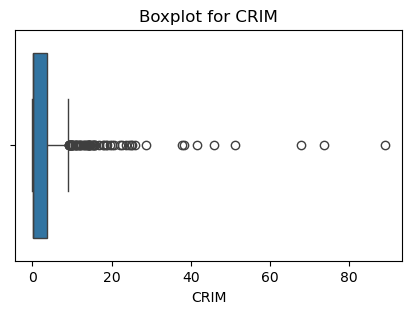

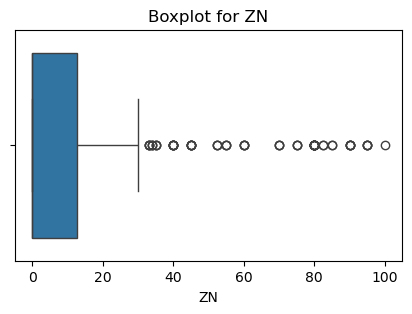

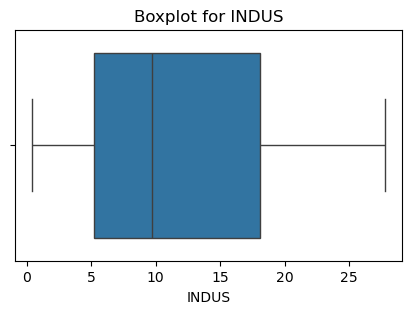

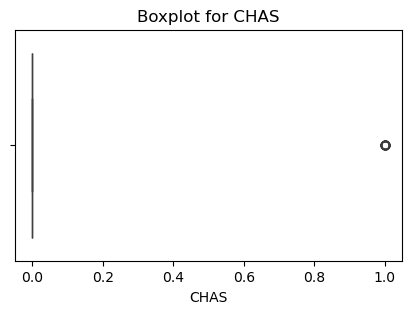

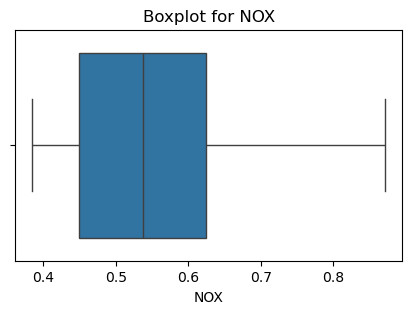

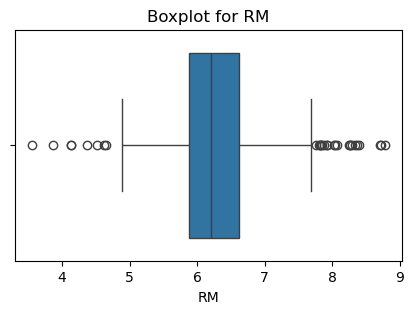

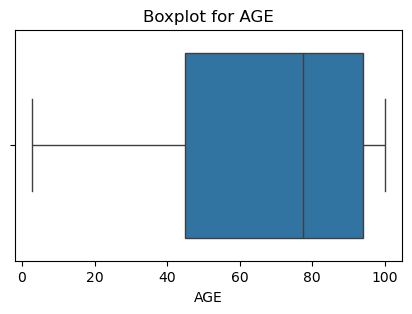

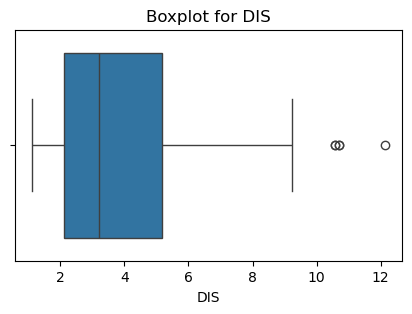

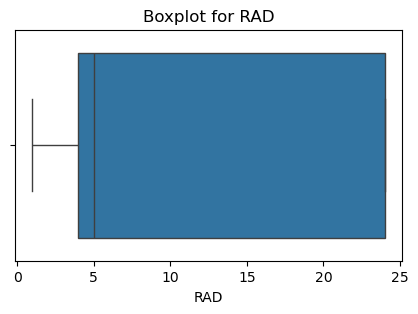

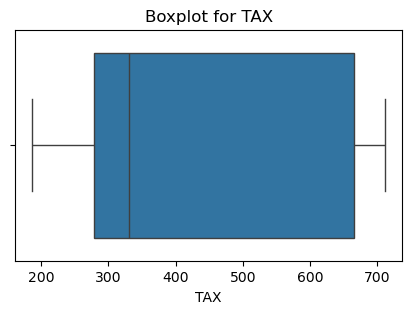

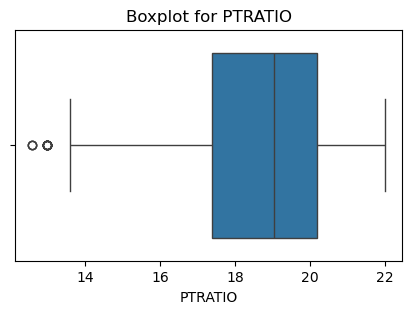

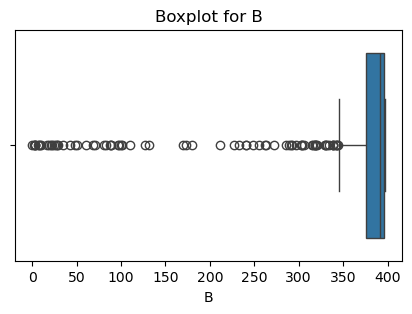

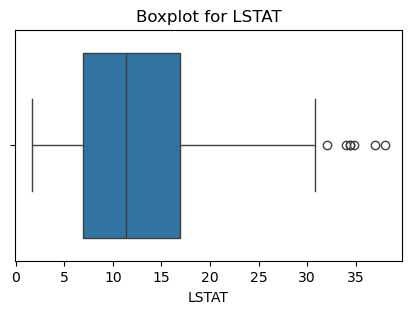

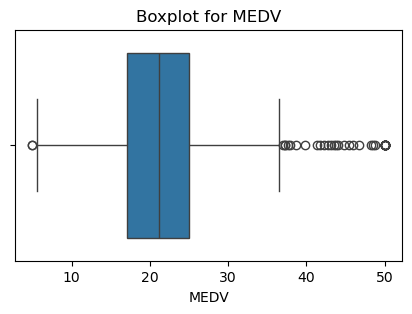

In [18]:
# Loop through all numerical columns and create a boxplot for each
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

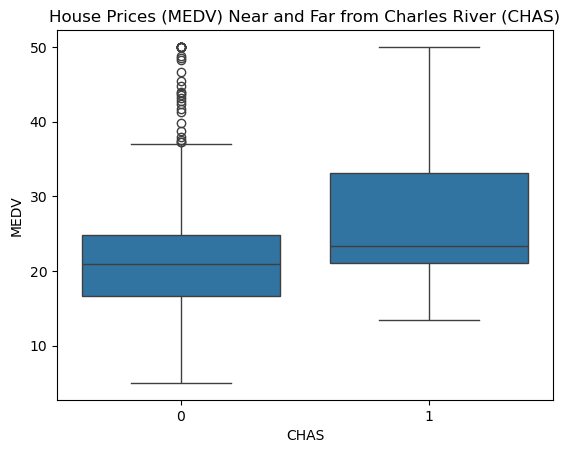

In [19]:
# Boxplot of MEDV for houses near (CHAS=1) and far (CHAS=0) from the river

sns.boxplot(x='CHAS', y='MEDV', data=data)
plt.title('House Prices (MEDV) Near and Far from Charles River (CHAS)')
plt.show()


In [20]:
# Interpreting from Scatter Plots

In [21]:
# Detecting Linear Relationships

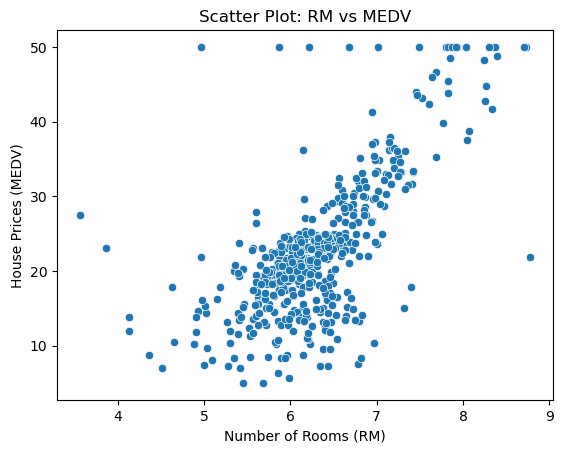

In [22]:
# Positive Linear Relationship

# Scatter plot between number of rooms (RM) and price (MEDV)
sns.scatterplot(x='RM', y='MEDV', data=data)
plt.title('Scatter Plot: RM vs MEDV')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('House Prices (MEDV)')
plt.show()


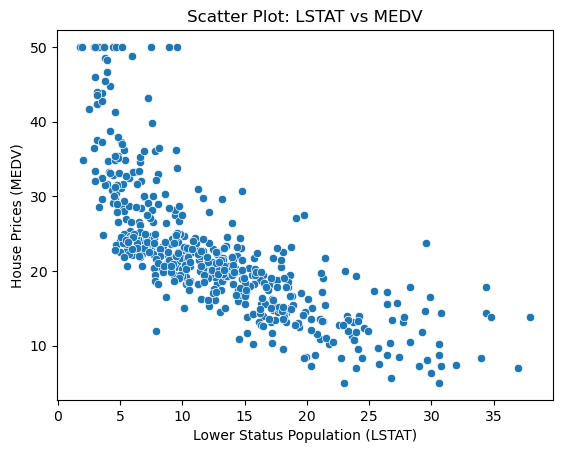

In [23]:
# Negative Linear Relationship

# Scatter plot between LSTAT and MEDV
sns.scatterplot(x='LSTAT', y='MEDV', data=data)
plt.title('Scatter Plot: LSTAT vs MEDV')
plt.xlabel('Lower Status Population (LSTAT)')
plt.ylabel('House Prices (MEDV)')
plt.show()


In [24]:
# Detecting Non-Linear Relationships

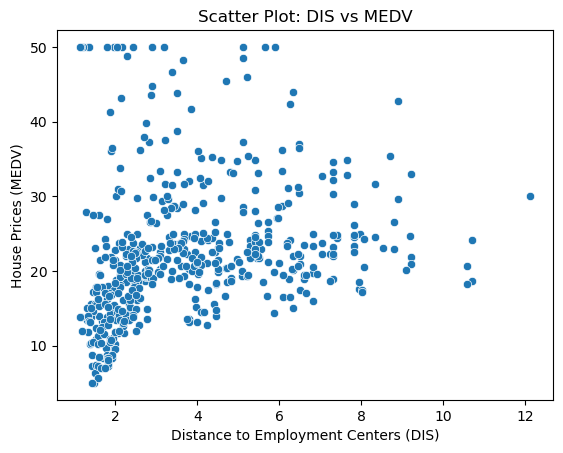

In [25]:


# Scatter plot between DIS and MEDV
sns.scatterplot(x='DIS', y='MEDV', data=data)
plt.title('Scatter Plot: DIS vs MEDV')
plt.xlabel('Distance to Employment Centers (DIS)')
plt.ylabel('House Prices (MEDV)')
plt.show()


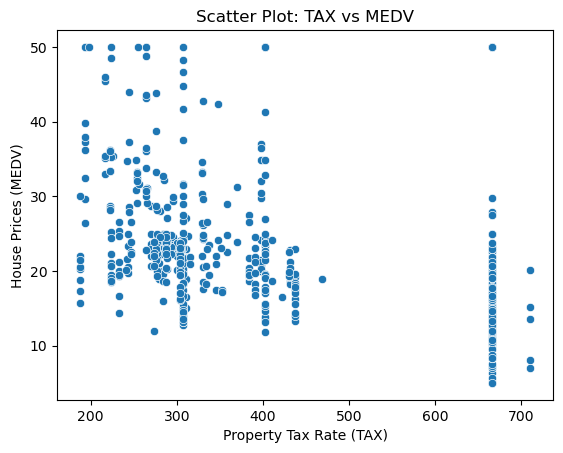

In [26]:
# Scatter plot between TAX and MEDV
sns.scatterplot(x='TAX', y='MEDV', data=data)
plt.title('Scatter Plot: TAX vs MEDV')
plt.xlabel('Property Tax Rate (TAX)')
plt.ylabel('House Prices (MEDV)')
plt.show()


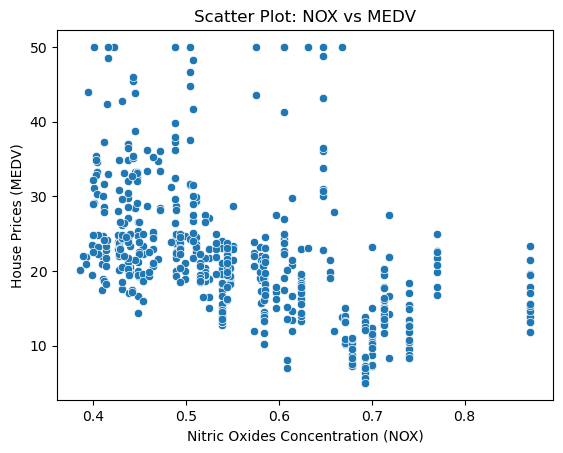

In [27]:
# Scatter plot between NOX and MEDV
sns.scatterplot(x='NOX', y='MEDV', data=data)
plt.title('Scatter Plot: NOX vs MEDV')
plt.xlabel('Nitric Oxides Concentration (NOX)')
plt.ylabel('House Prices (MEDV)')
plt.show()


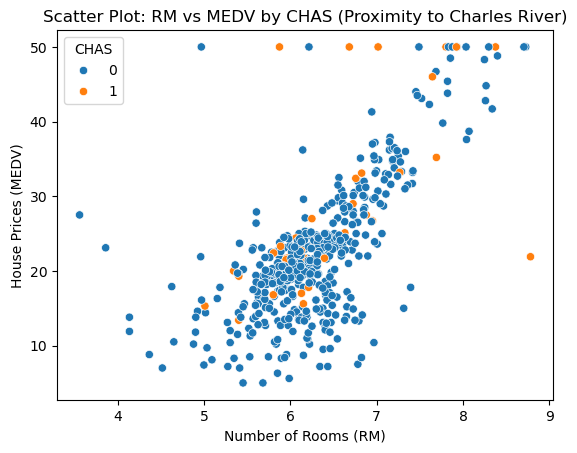

In [28]:
# Scatter plot between RM and MEDV, colored by CHAS
sns.scatterplot(x='RM', y='MEDV', hue='CHAS', data=data)
plt.title('Scatter Plot: RM vs MEDV by CHAS (Proximity to Charles River)')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('House Prices (MEDV)')
plt.show()


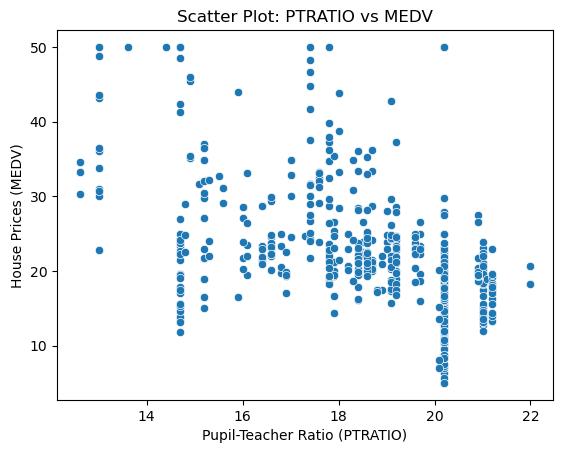

In [29]:
# Scatter plot between PTRATIO and MEDV
sns.scatterplot(x='PTRATIO', y='MEDV', data=data)
plt.title('Scatter Plot: PTRATIO vs MEDV')
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('House Prices (MEDV)')
plt.show()


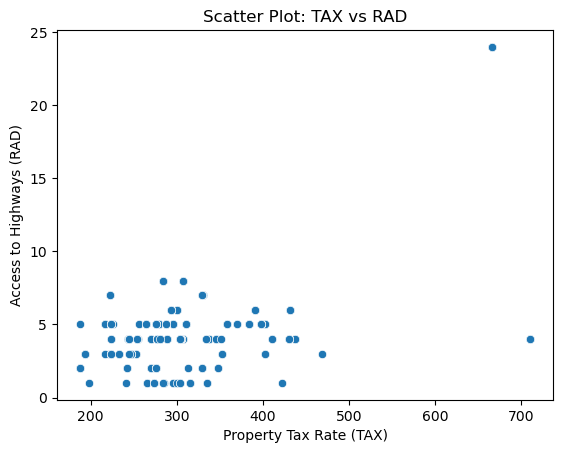

In [30]:
# Scatter plot between TAX and RAD
sns.scatterplot(x='TAX', y='RAD', data=data)
plt.title('Scatter Plot: TAX vs RAD')
plt.xlabel('Property Tax Rate (TAX)')
plt.ylabel('Access to Highways (RAD)')
plt.show()


In [31]:
# Look for Relationships Between Features

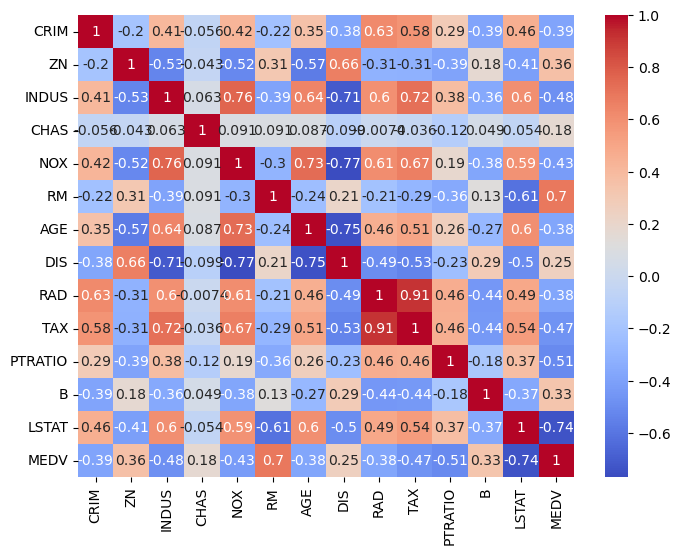

In [32]:
# Correlation heatmap to see how features are related
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [33]:
# Data Pre-processing:

In [34]:
# Handling missing data: Not present missing data

In [35]:
# Handling Outliers

In [36]:
# For CRIM (Per Capita Crime Rate)
Q1 = data['CRIM'].quantile(0.25)
Q3 = data['CRIM'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [37]:
# Capping Outliers
data['CRIM'] = np.where(data['CRIM'] > upper_bound, upper_bound, data['CRIM'])


In [38]:
# ZN
Q1 = data['ZN'].quantile(0.25)
Q3 = data['ZN'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [39]:
# Capping Outliers
data['ZN'] = np.where(data['ZN'] > upper_bound, upper_bound, data['ZN'])


In [40]:
# INDUS
Q1 = data['INDUS'].quantile(0.25)
Q3 = data['INDUS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [41]:
# Cappping outliers
data = data[(data['INDUS'] >= lower_bound) & (data['INDUS'] <= upper_bound)]


In [42]:
# NOX
Q1 = data['NOX'].quantile(0.25)
Q3 = data['NOX'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [43]:
# capping outliers
data['NOX'] = np.where(data['NOX'] > upper_bound, upper_bound, data['NOX'])


In [44]:
# RM
Q1 = data['RM'].quantile(0.25)
Q3 = data['RM'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [45]:
# capping outliers
data['RM'] = np.where(data['RM'] > upper_bound, upper_bound, data['RM'])


In [46]:
# AGE
Q1 = data['AGE'].quantile(0.25)
Q3 = data['AGE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [47]:
# Capping outliers
data['AGE'] = np.where(data['AGE'] > upper_bound, upper_bound, data['AGE'])


In [48]:
# DIS
Q1 = data['DIS'].quantile(0.25)
Q3 = data['DIS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [49]:
# capping outliers
data['DIS'] = np.where(data['DIS'] > upper_bound, upper_bound, data['DIS'])


In [50]:
# RAD
Q1 = data['RAD'].quantile(0.25)
Q3 = data['RAD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [51]:
# capping outliers
data['RAD'] = np.where(data['RAD'] > upper_bound, upper_bound, data['RAD'])


In [52]:
# TAX
Q1 = data['TAX'].quantile(0.25)
Q3 = data['TAX'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [53]:
# capping outliers
data['TAX'] = np.where(data['TAX'] > upper_bound, upper_bound, data['TAX'])


In [54]:
# PTRATIO
Q1 = data['PTRATIO'].quantile(0.25)
Q3 = data['PTRATIO'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [55]:
# capping outliers
data['PTRATIO'] = np.where(data['PTRATIO'] > upper_bound, upper_bound, data['PTRATIO'])


In [56]:
# B
Q1 = data['B'].quantile(0.25)
Q3 = data['B'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [57]:
# capping outliers
data['B'] = np.where(data['B'] > upper_bound, upper_bound, data['B'])


In [58]:
# LSTAT
Q1 = data['LSTAT'].quantile(0.25)
Q3 = data['LSTAT'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [59]:
# capping outliers
data['LSTAT'] = np.where(data['LSTAT'] > upper_bound, upper_bound, data['LSTAT'])


In [60]:
# MEDV
Q1 = data['MEDV'].quantile(0.25)
Q3 = data['MEDV'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [61]:
# capping outliers
data['MEDV'] = np.where(data['MEDV'] > upper_bound, upper_bound, data['MEDV'])


In [62]:
# Summarizing the Data

# Get summary statistics for numerical features
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     2.225032    6.963439   11.136779    0.069170    0.554695    6.266694   
std      3.313353   12.028788    6.860353    0.253994    0.115878    0.655550   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max      9.069639   31.250000   27.740000    1.000000    0.871000    7.730500   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.783947    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.0697

In [63]:
# Feature Scaling - Normalization

In [64]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your original DataFrame and 'MEDV' is the target column
X = data.drop(columns=['MEDV'])  # Exclude MEDV for normalization
y = data['MEDV']  # Store the target variable separately

# Normalize the input features (X)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Convert the normalized data back into a DataFrame for easy viewing
data_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Add the target column back if needed
data_normalized['MEDV'] = y


In [65]:
# Check the shape of the dataset
print(data_normalized.shape)

(506, 14)


In [66]:
# Check the min and max values of the normalized data
print(data_normalized.min())
print(data_normalized.max())


CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       5.0
dtype: float64
CRIM        1.0000
ZN          1.0000
INDUS       1.0000
CHAS        1.0000
NOX         1.0000
RM          1.0000
AGE         1.0000
DIS         1.0000
RAD         1.0000
TAX         1.0000
PTRATIO     1.0000
B           1.0000
LSTAT       1.0000
MEDV       36.9625
dtype: float64


In [67]:
# Calculate skewness for each feature
skewness = data_normalized.skew()

print(skewness)


CRIM       1.282313
ZN         1.261340
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM        -0.034393
AGE       -0.598963
DIS        0.908467
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.808671
MEDV       0.353154
dtype: float64


In [68]:
# Identify skewed features (you can set a threshold for skewness, e.g., 0.5)
skewed_features = skewness[skewness > 0.5].index

# Apply log transformation (log(1 + x)) to reduce skewness for all skewed features
for feature in skewed_features:
    data_normalized[f'log_{feature}'] = np.log1p(data_normalized[feature])

# Check the skewness after transformation
new_skewness = data_normalized[skewed_features].skew()
print(new_skewness)

CRIM     1.282313
ZN       1.261340
CHAS     3.405904
NOX      0.729308
DIS      0.908467
RAD      1.004815
TAX      0.669956
LSTAT    0.808671
dtype: float64


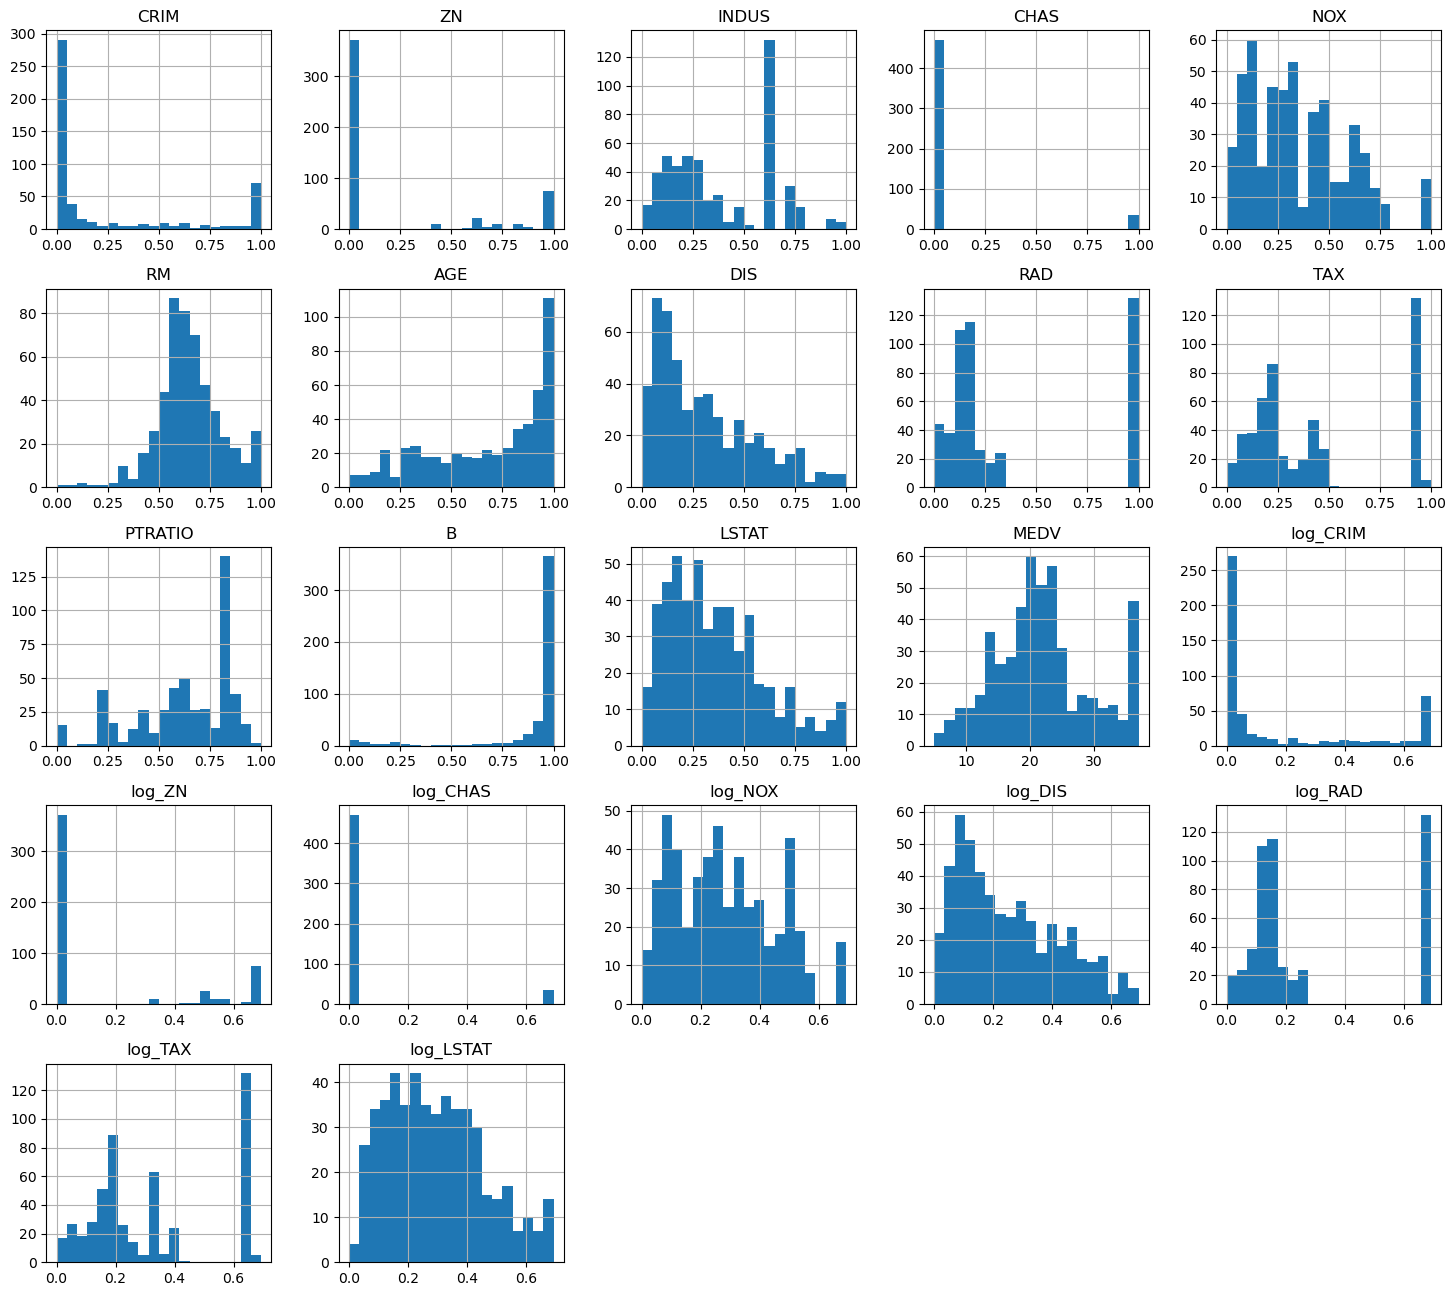

In [69]:
# Ploting histograms for each numerical feature
data_normalized.hist(bins=20, figsize=(18, 16))
plt.show()

In [70]:
# Feature Selection:

In [71]:
# Compute the correlation matrix
correlation_matrix = data.corr()


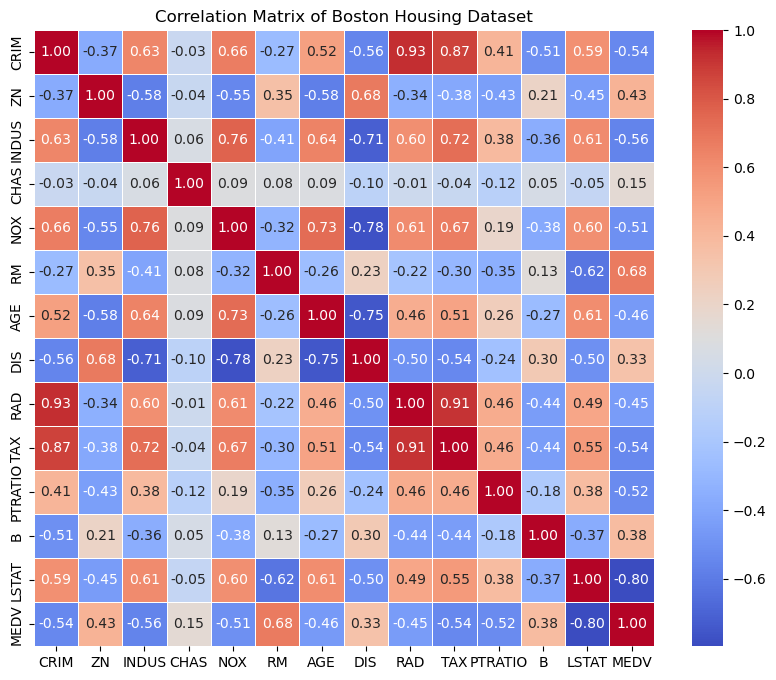

In [72]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Boston Housing Dataset')
plt.show()


In [73]:
# Sort features by their correlation with MEDV
correlation_with_medv = correlation_matrix['MEDV'].sort_values(ascending=False)
print("Correlation of each feature with MEDV:\n", correlation_with_medv)


Correlation of each feature with MEDV:
 MEDV       1.000000
RM         0.676603
ZN         0.428114
B          0.378054
DIS        0.333092
CHAS       0.146059
RAD       -0.452700
AGE       -0.458665
NOX       -0.506508
PTRATIO   -0.524690
CRIM      -0.538617
TAX       -0.543556
INDUS     -0.561167
LSTAT     -0.797209
Name: MEDV, dtype: float64


In [74]:
# Threshold for considering high correlation
threshold = 0.8
high_corr_features = set()

# Iterate through the correlation matrix to find highly correlated feature pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Only check upper triangle
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)
            
print("Features to consider removing due to high inter-correlation:", high_corr_features)


Features to consider removing due to high inter-correlation: {'RAD', 'TAX'}


In [75]:
# Applying Ensemble Learning:

In [76]:
# Combining Random Forest and Gradient Boosting Regressor using Ridge regression as meta-model:

In [77]:
# importing necessary library:

# For splitting dataset
from sklearn.model_selection import train_test_split

# For evaluating models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For different models:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import minimize

In [78]:
# final feature selection based on correlation analysis:

selected_features = ['RM', 'PTRATIO', 'LSTAT', 'NOX', 'CRIM', 'TAX', 'INDUS']
X = data[selected_features]  # Final selected features
y = data['MEDV']  # Target variable


In [79]:
print("Final selected features for model building:", X.columns.tolist())


Final selected features for model building: ['RM', 'PTRATIO', 'LSTAT', 'NOX', 'CRIM', 'TAX', 'INDUS']


In [80]:
# Split the Dataset into Training and Test Sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)


In [81]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth=16, min_samples_split=3, min_samples_leaf=1, max_features=None, bootstrap=True, random_state=52)

gb_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.9,
    min_samples_split=3,
    min_samples_leaf=1,
    random_state=52
)

et_model = ExtraTreesRegressor(n_estimators=300, max_depth=16, min_samples_split=3, min_samples_leaf=1, random_state=52)

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.02, max_depth=7, colsample_bytree=0.9, subsample=0.9, random_state=52)

# Train optimized base models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=52, ...)

In [82]:
# Get predictions
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
et_pred = et_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

In [83]:
# Ensemble Weight Optimization using Mean Absolute Error (MAE)

def ensemble_loss(weights):
    final_pred = weights[0] * rf_pred + weights[1] * gb_pred + weights[2] * et_pred + weights[3] * xgb_pred
    return mean_absolute_error(y_test, final_pred)

constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = [(0, 1)] * 4
initial_weights = [0.25, 0.25, 0.25, 0.25]
res = minimize(ensemble_loss, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
opt_weights = res.x

# Final Optimized Ensemble Prediction
final_pred = opt_weights[0] * rf_pred + opt_weights[1] * gb_pred + opt_weights[2] * et_pred + opt_weights[3] * xgb_pred

In [84]:
# Evaluate Performance
mae = mean_absolute_error(y_test, final_pred)
mse = mean_squared_error(y_test, final_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_pred)

print("Optimized Weighted Ensemble Performance:")
print(f"Optimal Weights: {opt_weights}")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

Optimized Weighted Ensemble Performance:
Optimal Weights: [0.00000000e+00 7.48379434e-01 3.45116659e-06 2.51617114e-01]
MAE: 1.711
MSE: 6.164
RMSE: 2.483
R²: 0.912
